In [1]:
# Setup and Imports
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
from IPython.display import Image, display

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Ensure project_root is defined for subsequent cells
print(f'Project Root: {project_root}')

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Common imports
from src.envs.synthetic_env import BouncingBallEnv
from src.envs.atari_env import AtariPixelEnv


Project Root: /Users/yezune/ws/from_pixels_to_planning
Using device: cpu


objc[38602]: Class CaptureDelegate is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x1198125d8) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_videoio.4.12.0.dylib (0x12e1a4618). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[38602]: Class CVWindow is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x119812628) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_highgui.4.12.0.dylib (0x12d94ca70). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[38602]: Class CVView is implemented in both /Users/yezune/ws/from_pixels_to_planning/.venv/lib/python3.14/site-packages/cv2/cv2.abi3.so (0x119812650) and /opt/homebrew/Cellar/opencv/4.12.0_15/lib/libopencv_highgui.4.12.0.dylib (0x12d94ca98). This may cause spu

# Experiment 5: Performance Comparison

## 3. Performance Comparison

Comparing Flat vs Hierarchical Agents based on `comparison_results.json`.

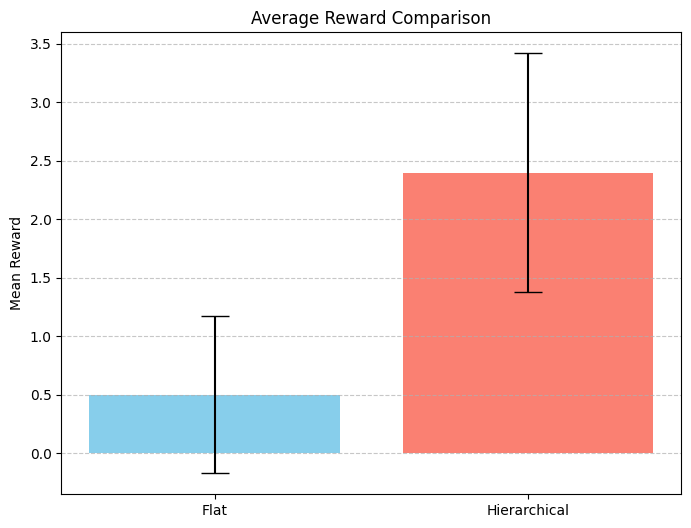

Detailed Results:
{
    "Flat": {
        "rewards": [
            0.0,
            0.0,
            0.0,
            1.0,
            0.0,
            0.0,
            1.0,
            2.0,
            0.0,
            1.0
        ],
        "lengths": [
            496.0,
            498.0,
            494.0,
            603.0,
            496.0,
            499.0,
            611.0,
            731.0,
            498.0,
            614.0
        ],
        "mean_reward": 0.5,
        "std_reward": 0.6708203932499369,
        "mean_length": 554.0
    },
    "Hierarchical": {
        "rewards": [
            4.0,
            3.0,
            2.0,
            2.0,
            2.0,
            3.0,
            3.0,
            3.0,
            0.0,
            2.0
        ],
        "lengths": [
            1000.0,
            1000.0,
            790.0,
            792.0,
            787.0,
            989.0,
            991.0,
            984.0,
            489.0,
            787.0
   

In [2]:
results_path = os.path.join(project_root, 'comparison_results.json')

if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        results = json.load(f)
        
    names = list(results.keys())
    means = [results[n]['mean_reward'] for n in names]
    stds = [results[n]['std_reward'] for n in names]
    
    plt.figure(figsize=(8, 6))
    plt.bar(names, means, yerr=stds, capsize=10, color=['skyblue', 'salmon'])
    plt.title("Average Reward Comparison")
    plt.ylabel("Mean Reward")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    print("Detailed Results:")
    print(json.dumps(results, indent=4))
else:
    print("comparison_results.json not found. Run 'src/experiments/run_comparison.py' first.")